In [1]:
# 디렉토리 설정
import os

os.chdir('C:\\Users\\rbden\\OneDrive\\바탕 화면\\Univ\\R & Python\\Python\\Pythondata')

os.getcwd()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_train_ver_3.csv')

df.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,4709,0,0,0,Commercial_associate_etc,2,7,3,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1540,0,0,1,Laborers,3,8,4,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,4434,0,1,0,Managers,2,10,4,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,2092,0,1,0,Sales staff,2,7,3,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,2105,0,0,0,Managers,2,5,2,2.000000,0


In [3]:
idx = list(df.columns.values).index('DAYS_EMPLOYED')

df.insert(idx + 1 , 'START_EMPLOYED' , df['DAYS_BIRTH'] - df['DAYS_EMPLOYED'])

df

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,9190,0,0,0,Commercial_associate_etc,2,7,3,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,9840,0,0,1,Laborers,3,8,4,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,14653,0,1,0,Managers,2,10,4,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,12996,0,1,0,Sales staff,2,7,3,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,12932,0,0,0,Managers,2,5,2,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,ID-8754,1,0,0,0,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,...,9757,0,1,0,Laborers,1,8,3,2.000000,0
8755,ID-8755,1,0,0,1,1,180000.0,Working,Higher education,Separated,...,12816,0,0,0,Working_etc,2,6,3,2.000000,1
8756,ID-8756,1,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,8067,0,0,0,Core staff,2,9,4,2.000000,0
8757,ID-8757,1,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,...,10038,0,0,0,Laborers,1,6,3,2.000000,0


# 소득 분위 관련

## A. 특정 조건일 때, 소득 분위가 낮아도 신용도가 높을 것

### 1. 직업 관련

In [4]:
high_income = df[df['income_percentile'] >= 7]
low_income = df[df['income_percentile'] <= 4]

# 10개 분위로 쪼갰는데 왜 개수가 다를까?
print('상위 40 % : ' ,len(high_income))
print('하위 40 % : ' ,len(low_income))

상위 40 % :  3147
하위 40 % :  3809


In [5]:
low_credit_avg = pd.DataFrame(low_income.groupby('occyp_type')['credit_avg'].mean())

low_credit_avg = low_credit_avg.rename(columns = {'credit_avg' : 'Low_income_credit_avg'})

low_credit_avg

,Low_income_credit_avg
occyp_type,
Accountants,1.484589
Cleaning staff,1.550734
Commercial_associate_etc,1.603629
Cooking staff,1.553358
Core staff,1.537582
Drivers,1.461050
HR staff,1.794643
High skill tech staff,1.523418
IT staff,1.488095


In [6]:
high_credit_avg = pd.DataFrame(high_income.groupby('occyp_type')['credit_avg'].mean())

high_credit_avg = high_credit_avg.rename(columns = {'credit_avg' : 'High_income_credit_avg'})

high_credit_avg

,High_income_credit_avg
occyp_type,
Accountants,1.588983
Cleaning staff,1.620678
Commercial_associate_etc,1.563709
Cooking staff,1.514167
Core staff,1.531733
Drivers,1.606458
HR staff,1.675000
High skill tech staff,1.587059
IT staff,1.583333


In [7]:
income_credit_avg = pd.merge(high_credit_avg , low_credit_avg , on = 'occyp_type')

income_credit_avg

,High_income_credit_avg,Low_income_credit_avg
occyp_type,,
Accountants,1.588983,1.484589
Cleaning staff,1.620678,1.550734
Commercial_associate_etc,1.563709,1.603629
Cooking staff,1.514167,1.553358
Core staff,1.531733,1.537582
Drivers,1.606458,1.461050
HR staff,1.675000,1.794643
High skill tech staff,1.587059,1.523418
IT staff,1.583333,1.488095


In [8]:
occyp_list = []

for i in range(len(income_credit_avg)) :
    
    if income_credit_avg.iloc[i , 1] <= income_credit_avg.iloc[i , 0] :
        
        occyp_list.append(income_credit_avg.index[i])
        
occyp_list

['Accountants',
 'Cleaning staff',
 'Drivers',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Managers',
 'Medicine staff',
 'Pensioner_etc',
 'Private service staff',
 'Realty agents',
 'Sales staff']

In [9]:
income_credit_avg = income_credit_avg.loc[occyp_list]

income_credit_avg

,High_income_credit_avg,Low_income_credit_avg
occyp_type,,
Accountants,1.588983,1.484589
Cleaning staff,1.620678,1.550734
Drivers,1.606458,1.461050
High skill tech staff,1.587059,1.523418
IT staff,1.583333,1.488095
Laborers,1.536823,1.498162
Managers,1.505650,1.497827
Medicine staff,1.596045,1.558637
Pensioner_etc,2.000000,2.000000


In [10]:
income_credit_avg.insert(2 , 'Difference between High & Low' , 
                         income_credit_avg['High_income_credit_avg'] - income_credit_avg['Low_income_credit_avg'])

In [11]:
income_credit_avg.sort_values('Difference between High & Low' , ascending = False)

,High_income_credit_avg,Low_income_credit_avg,Difference between High & Low
occyp_type,,,
Realty agents,1.690300,0.800000,0.890300
Drivers,1.606458,1.461050,0.145409
Accountants,1.588983,1.484589,0.104394
IT staff,1.583333,1.488095,0.095238
Sales staff,1.607582,1.533262,0.074320
Cleaning staff,1.620678,1.550734,0.069944
High skill tech staff,1.587059,1.523418,0.063642
Laborers,1.536823,1.498162,0.038662
Medicine staff,1.596045,1.558637,0.037408


#### (1) Accountants

Accountants


Text(0.5, 1.0, 'Accountants')

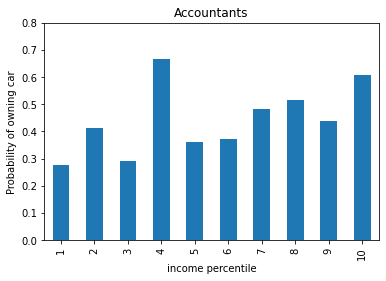

In [12]:
ans =  occyp_list[0] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Accountants')

Accountants


Text(0.5, 1.0, 'Accountants')

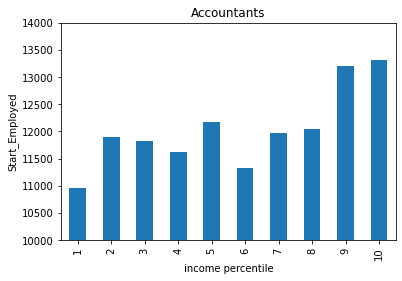

In [13]:
ans =  occyp_list[0] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 14000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Accountants')

Accountants


Text(0.5, 1.0, 'Accountants')

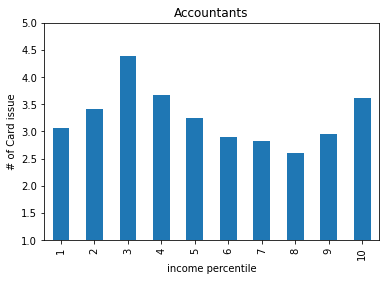

In [14]:
ans =  occyp_list[0] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Accountants')

Accountants


Text(0.5, 1.0, 'Accountants')

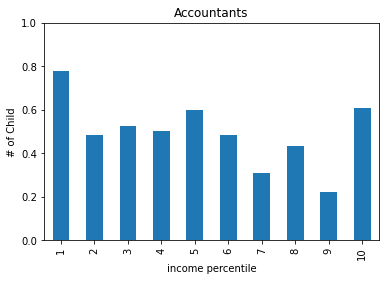

In [15]:
ans =  occyp_list[0] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Accountants')

#### (2) Cleaning staff

Cleaning staff


Text(0.5, 1.0, 'Cleaning staff')

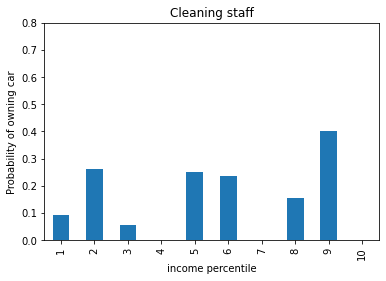

In [16]:
ans =  occyp_list[1] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Cleaning staff')

Cleaning staff


Text(0.5, 1.0, 'Cleaning staff')

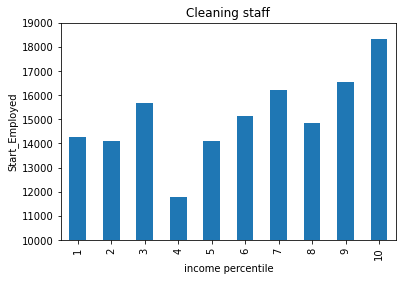

In [17]:
ans =  occyp_list[1] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 19000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Cleaning staff')

Cleaning staff


Text(0.5, 1.0, 'Cleaning staff')

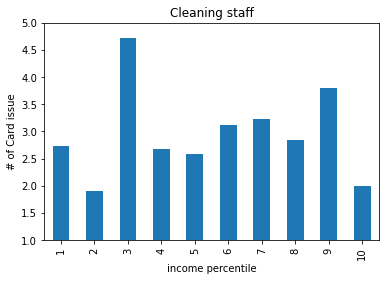

In [18]:
ans =  occyp_list[1] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Cleaning staff')

Cleaning staff


Text(0.5, 1.0, 'Cleaning staff')

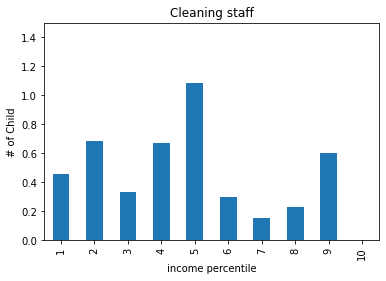

In [19]:
ans =  occyp_list[1] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1.5)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Cleaning staff')

#### (3) Drivers

Drivers


Text(0.5, 1.0, 'Drivers')

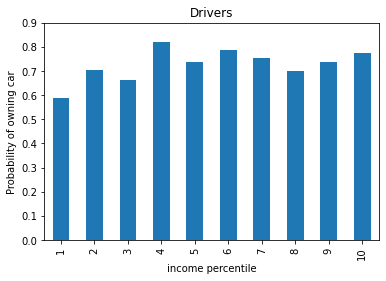

In [20]:
ans =  occyp_list[2]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.9)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Drivers')

Drivers


Text(0.5, 1.0, 'Drivers')

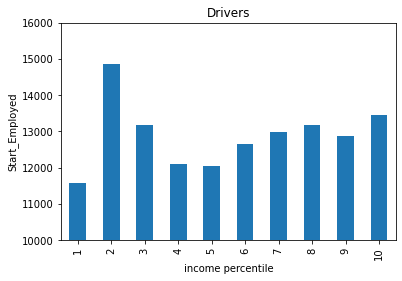

In [21]:
ans =  occyp_list[2] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 16000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Drivers')

Drivers


Text(0.5, 1.0, 'Drivers')

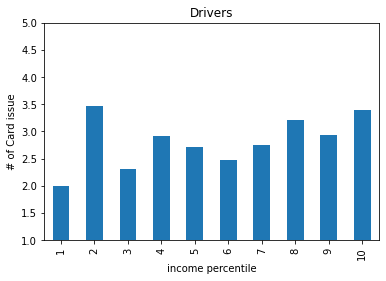

In [22]:
ans =  occyp_list[2] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Drivers')

Drivers


Text(0.5, 1.0, 'Drivers')

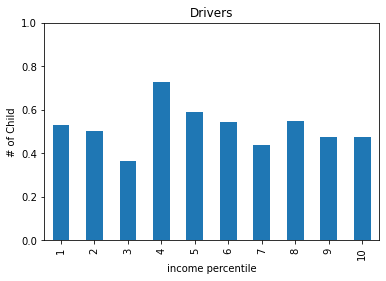

In [23]:
ans =  occyp_list[2] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Drivers')

#### (4) High skill tech staff

High skill tech staff


Text(0.5, 1.0, 'High skill tech staff')

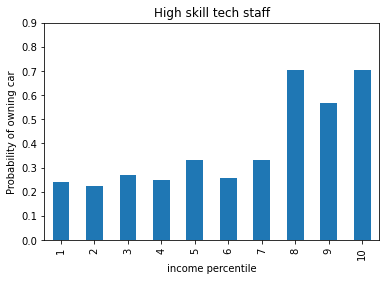

In [24]:
ans =  occyp_list[3]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.9)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('High skill tech staff')

High skill tech staff


Text(0.5, 1.0, 'High skill tech staff')

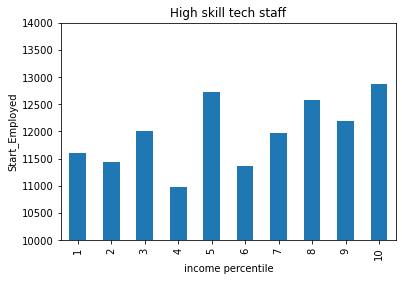

In [25]:
ans =  occyp_list[3] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 14000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('High skill tech staff')

High skill tech staff


Text(0.5, 1.0, 'High skill tech staff')

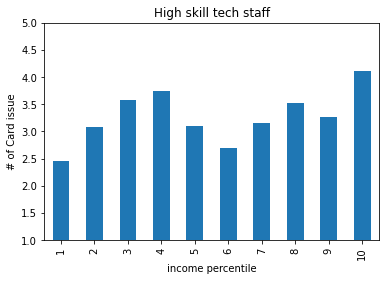

In [26]:
ans =  occyp_list[3] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('High skill tech staff')

High skill tech staff


Text(0.5, 1.0, 'High skill tech staff')

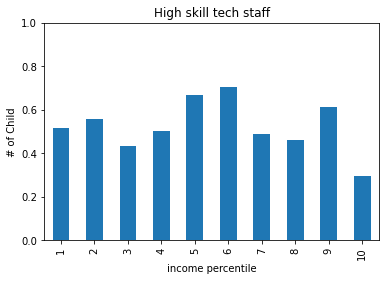

In [27]:
ans =  occyp_list[3] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('High skill tech staff')

#### (5) IT staff

IT staff


Text(0.5, 1.0, 'IT staff')

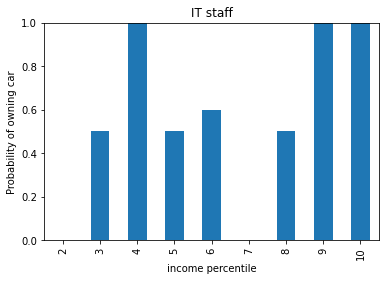

In [28]:
ans =  occyp_list[4]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('IT staff')

IT staff


Text(0.5, 1.0, 'IT staff')

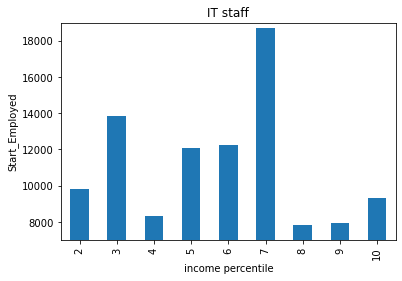

In [29]:
ans =  occyp_list[4] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(7000, 19000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('IT staff')

IT staff


Text(0.5, 1.0, 'IT staff')

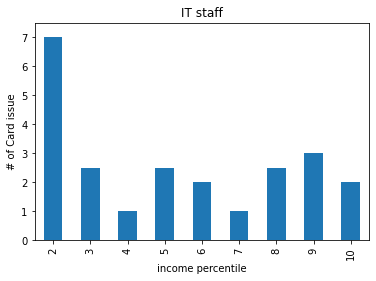

In [30]:
ans =  occyp_list[4] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(0, 7.5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('IT staff')

IT staff


Text(0.5, 1.0, 'IT staff')

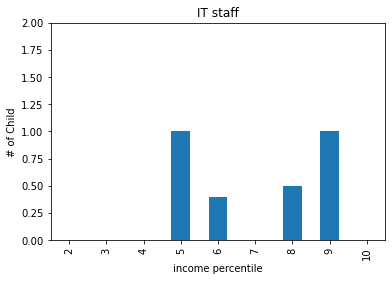

In [31]:
ans =  occyp_list[4] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 2)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('IT staff')

#### (6) Laborers

Laborers


Text(0.5, 1.0, 'Laborers')

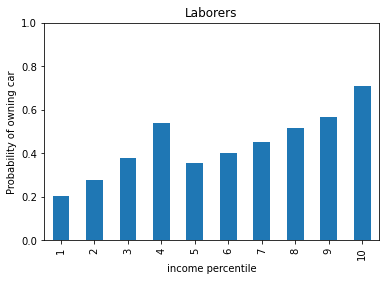

In [32]:
ans =  occyp_list[5]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Laborers')

Laborers


Text(0.5, 1.0, 'Laborers')

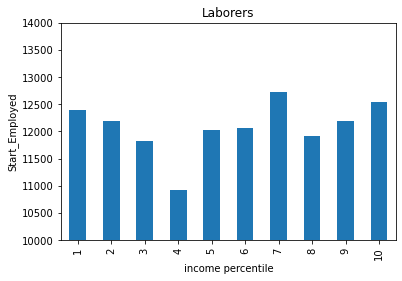

In [33]:
ans =  occyp_list[5] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 14000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Laborers')

Laborers


Text(0.5, 1.0, 'Laborers')

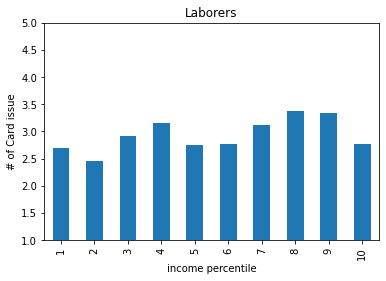

In [34]:
ans =  occyp_list[5] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Laborers')

Laborers


Text(0.5, 1.0, 'Laborers')

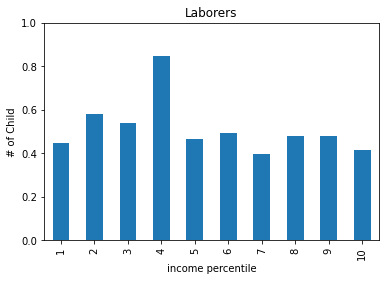

In [35]:
ans =  occyp_list[5] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Laborers')

#### (7) Managers

Managers


Text(0.5, 1.0, 'Managers')

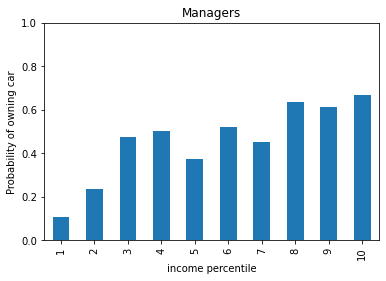

In [36]:
ans =  occyp_list[6]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Managers')

Managers


Text(0.5, 1.0, 'Managers')

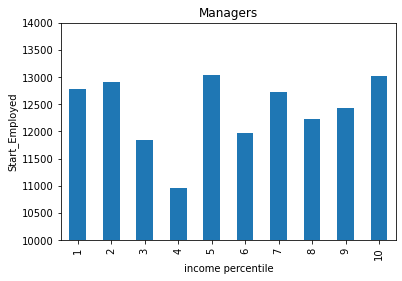

In [37]:
ans =  occyp_list[6] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 14000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Managers')

Managers


Text(0.5, 1.0, 'Managers')

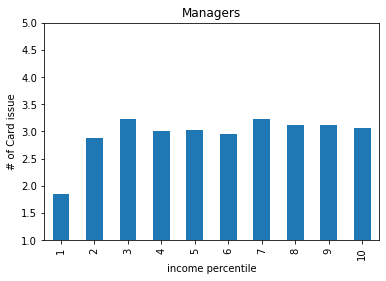

In [38]:
ans =  occyp_list[6] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Managers')

Managers


Text(0.5, 1.0, 'Managers')

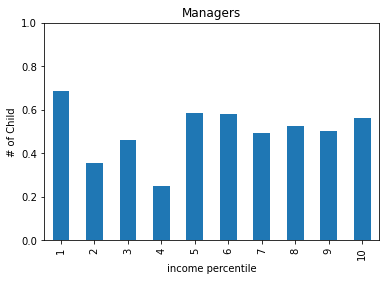

In [39]:
ans =  occyp_list[6] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Managers')

#### (8) Medicine staff

Medicine staff


Text(0.5, 1.0, 'Medicine staff')

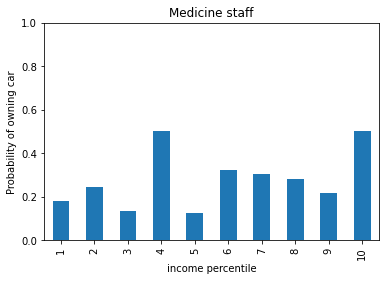

In [40]:
ans =  occyp_list[7]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Medicine staff')

Medicine staff


Text(0.5, 1.0, 'Medicine staff')

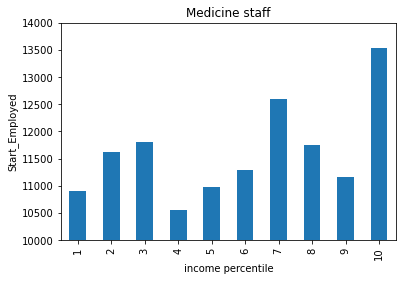

In [41]:
ans =  occyp_list[7] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 14000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Medicine staff')

Medicine staff


Text(0.5, 1.0, 'Medicine staff')

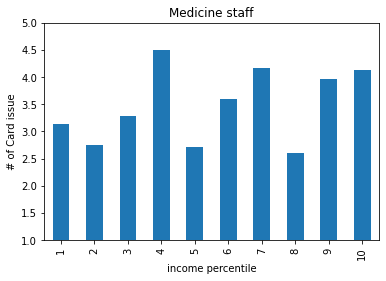

In [42]:
ans =  occyp_list[7] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Medicine staff')

Medicine staff


Text(0.5, 1.0, 'Medicine staff')

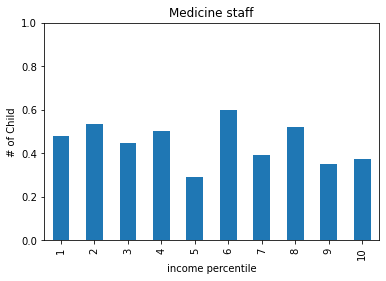

In [43]:
ans =  occyp_list[7] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Medicine staff')

#### (9) Pensioner_etc

Pensioner_etc


Text(0.5, 1.0, 'Pensioner_etc')

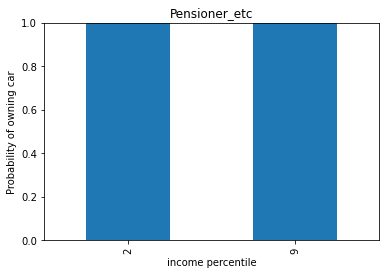

In [44]:
ans =  occyp_list[8]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Pensioner_etc')

Pensioner_etc


Text(0.5, 1.0, 'Pensioner_etc')

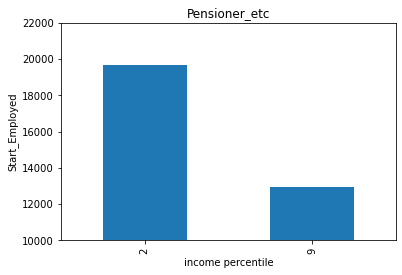

In [45]:
ans =  occyp_list[8] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 22000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Pensioner_etc')

Pensioner_etc


Text(0.5, 1.0, 'Pensioner_etc')

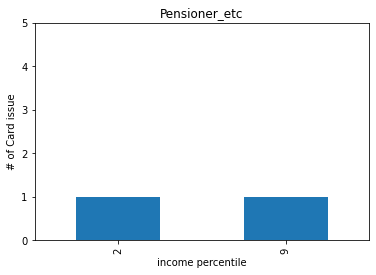

In [46]:
ans =  occyp_list[8] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(0, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Pensioner_etc')

Pensioner_etc


Text(0.5, 1.0, 'Pensioner_etc')

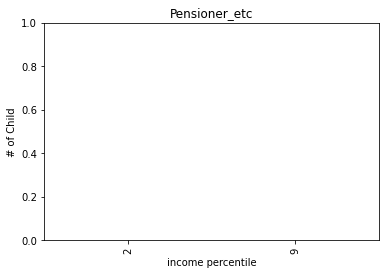

In [47]:
ans =  occyp_list[8] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Pensioner_etc')

#### (10) Private service staff

Private service staff


Text(0.5, 1.0, 'Private service staff')

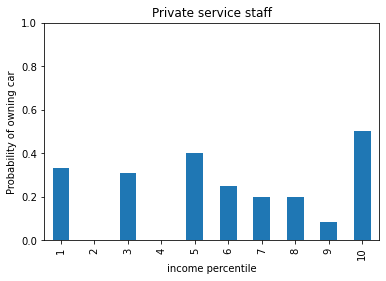

In [48]:
ans =  occyp_list[9]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Private service staff')

Private service staff


Text(0.5, 1.0, 'Private service staff')

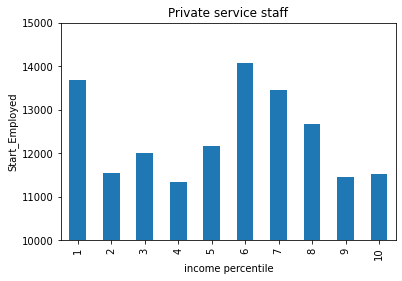

In [49]:
ans =  occyp_list[9] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 15000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Private service staff')

Private service staff


Text(0.5, 1.0, 'Private service staff')

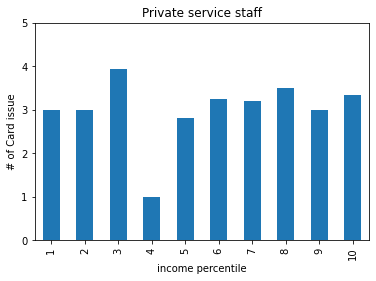

In [50]:
ans =  occyp_list[9] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(0 , 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Private service staff')

Private service staff


Text(0.5, 1.0, 'Private service staff')

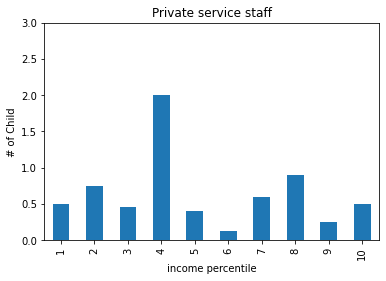

In [51]:
ans =  occyp_list[9] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 3)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Private service staff')

#### (11) Realty agents

Realty agents


Text(0.5, 1.0, 'Realty agents')

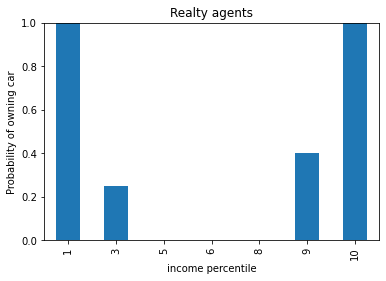

In [52]:
ans =  occyp_list[10]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Realty agents')

Realty agents


Text(0.5, 1.0, 'Realty agents')

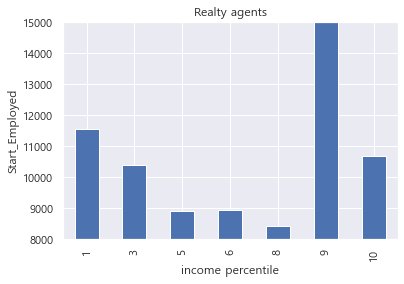

In [100]:
ans =  occyp_list[10] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(8000, 15000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Realty agents')

Realty agents


Text(0.5, 1.0, 'Realty agents')

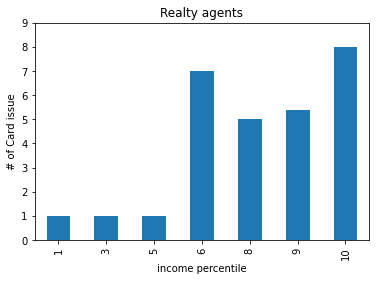

In [54]:
ans =  occyp_list[10] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(0, 9)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Realty agents')

Realty agents


Text(0.5, 1.0, 'Realty agents')

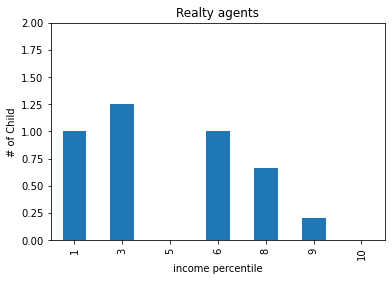

In [55]:
ans =  occyp_list[10] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 2)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Realty agents')

#### (12) Sales staff

Sales staff


Text(0.5, 1.0, 'Sales staff')

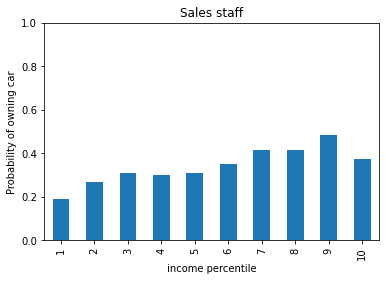

In [56]:
ans =  occyp_list[11]
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Sales staff')

Sales staff


Text(0.5, 1.0, 'Sales staff')

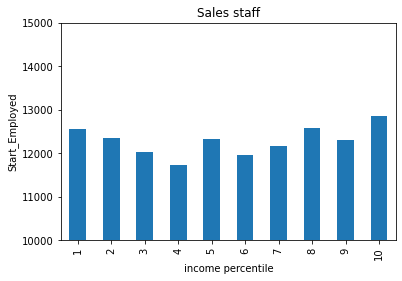

In [57]:
ans =  occyp_list[11] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 15000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Sales staff')

Sales staff


Text(0.5, 1.0, 'Sales staff')

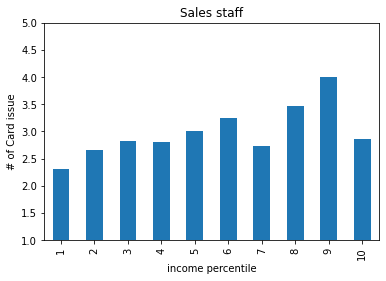

In [58]:
ans =  occyp_list[11] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Sales staff')

Sales staff


Text(0.5, 1.0, 'Sales staff')

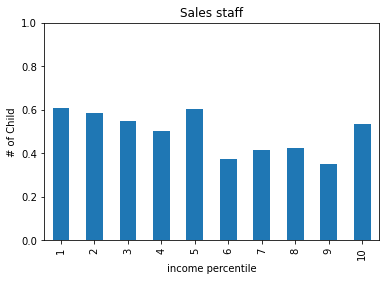

In [59]:
ans =  occyp_list[11] 
        
data = df[df['occyp_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Sales staff')

### 2. 상관관계 파악

#### (1) 연속형 변수

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8759 non-null   object 
 1   Counts             8759 non-null   int64  
 2   gender             8759 non-null   int64  
 3   car                8759 non-null   int64  
 4   reality            8759 non-null   int64  
 5   child_num          8759 non-null   int64  
 6   income_total       8759 non-null   float64
 7   income_type        8759 non-null   object 
 8   edu_type           8759 non-null   object 
 9   family_type        8759 non-null   object 
 10  house_type         8759 non-null   object 
 11  DAYS_BIRTH         8759 non-null   int64  
 12  DAYS_EMPLOYED      8759 non-null   int64  
 13  START_EMPLOYED     8759 non-null   int64  
 14  work_phone         8759 non-null   int64  
 15  phone              8759 non-null   int64  
 16  email              8759 

In [61]:
연속 = df[['Counts' , 'child_num' , 'income_total' , 'DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'START_EMPLOYED' , 'family_size' , 'credit_avg' ]]

연속

,Counts,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,START_EMPLOYED,family_size,credit_avg
0,5,0,202500.0,13899,4709,9190,2,1.600000
1,9,1,247500.0,11380,1540,9840,3,0.555556
2,6,0,450000.0,19087,4434,14653,2,1.833333
3,2,0,202500.0,15088,2092,12996,2,1.000000
4,1,0,157500.0,15037,2105,12932,2,2.000000
...,...,...,...,...,...,...,...,...
8754,1,0,225000.0,10338,581,9757,1,2.000000
8755,1,1,180000.0,15291,2475,12816,2,2.000000
8756,1,0,292500.0,10082,2015,8067,2,2.000000
8757,1,0,171000.0,10145,107,10038,1,2.000000


<AxesSubplot:>

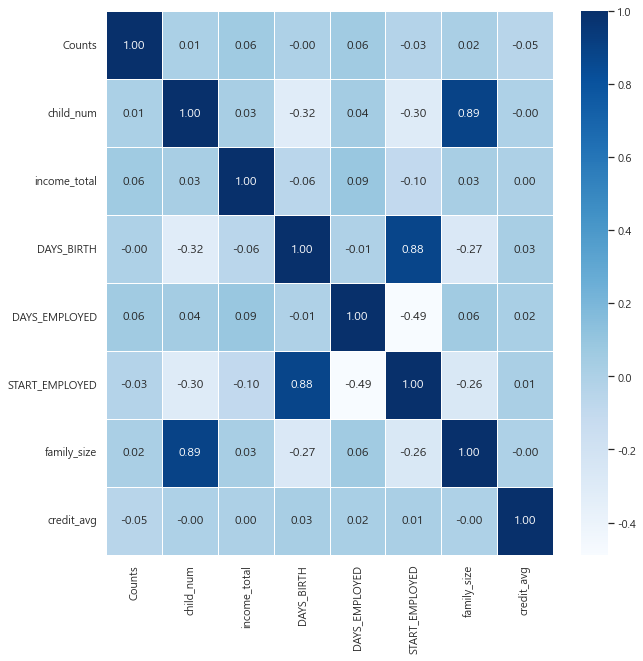

In [62]:
plt.figure(figsize=(10,10))


plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')


sns.heatmap(data = 연속.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 2. income_type 관련

In [4]:
high_income = df[df['income_percentile'] >= 7]
low_income = df[df['income_percentile'] <= 4]

# 10개 분위로 쪼갰는데 왜 개수가 다를까?
print('상위 40 % : ' ,len(high_income))
print('하위 40 % : ' ,len(low_income))

상위 40 % :  3147
하위 40 % :  3809


In [64]:
low_credit_avg = pd.DataFrame(low_income.groupby('income_type')['credit_avg'].mean())

low_credit_avg = low_credit_avg.rename(columns = {'credit_avg' : 'Low_income_credit_avg'})

low_credit_avg

,Low_income_credit_avg
income_type,
Commercial associate,1.531395
Pensioner,1.555399
State servant,1.560387
Student,2.000000
Working,1.536193


In [65]:
high_credit_avg = pd.DataFrame(high_income.groupby('income_type')['credit_avg'].mean())

high_credit_avg = high_credit_avg.rename(columns = {'credit_avg' : 'High_income_credit_avg'})

high_credit_avg

,High_income_credit_avg
income_type,
Commercial associate,1.566866
Pensioner,1.556680
State servant,1.551970
Working,1.550153


In [67]:
income_credit_avg = pd.merge(high_credit_avg , low_credit_avg , on = 'income_type')

income_credit_avg

,High_income_credit_avg,Low_income_credit_avg
income_type,,
Commercial associate,1.566866,1.531395
Pensioner,1.556680,1.555399
State servant,1.551970,1.560387
Working,1.550153,1.536193


In [68]:
income_list = []

for i in range(len(income_credit_avg)) :
    
    if income_credit_avg.iloc[i , 1] <= income_credit_avg.iloc[i , 0] :
        
        income_list.append(income_credit_avg.index[i])
        
income_list

['Commercial associate', 'Pensioner', 'Working']

In [69]:
income_credit_avg = income_credit_avg.loc[income_list]

income_credit_avg

,High_income_credit_avg,Low_income_credit_avg
income_type,,
Commercial associate,1.566866,1.531395
Pensioner,1.556680,1.555399
Working,1.550153,1.536193


In [70]:
income_credit_avg.insert(2 , 'Difference between High & Low' , 
                         income_credit_avg['High_income_credit_avg'] - income_credit_avg['Low_income_credit_avg'])

In [71]:
income_credit_avg.sort_values('Difference between High & Low' , ascending = False)

,High_income_credit_avg,Low_income_credit_avg,Difference between High & Low
income_type,,,
Commercial associate,1.566866,1.531395,0.035471
Working,1.550153,1.536193,0.013960
Pensioner,1.556680,1.555399,0.001281


#### (1) Commercial associate

Commercial associate


Text(0.5, 1.0, 'Commercial associate')

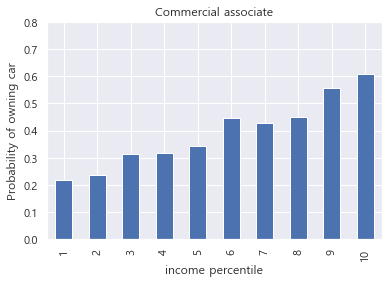

In [72]:
ans =  income_list[0] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Commercial associate')

Commercial associate


Text(0.5, 1.0, 'Commercial associate')

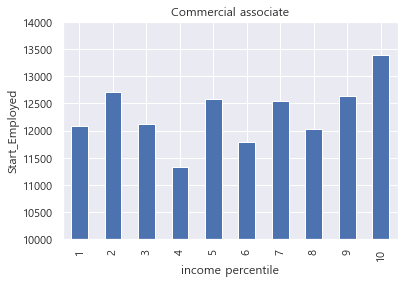

In [73]:
ans =  income_list[0] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 14000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Commercial associate')

Commercial associate


Text(0.5, 1.0, 'income')

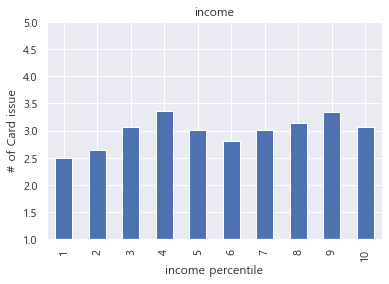

In [75]:
ans =  income_list[0] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('income')

Commercial associate


Text(0.5, 1.0, 'Commercial associate')

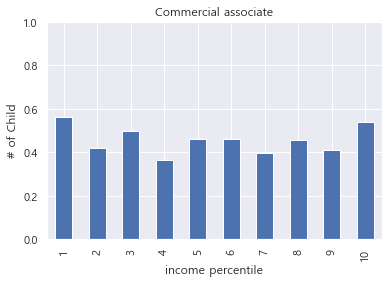

In [76]:
ans =  income_list[0] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Commercial associate')

#### (2) Pensioner

Pensioner


Text(0.5, 1.0, 'Pensioner')

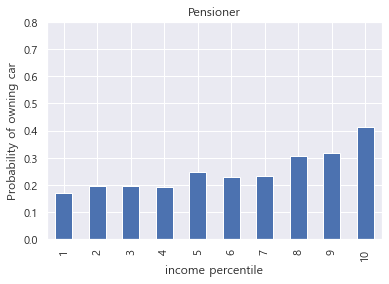

In [78]:
ans =  income_list[1] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Pensioner')

Pensioner


Text(0.5, 1.0, 'Pensioner')

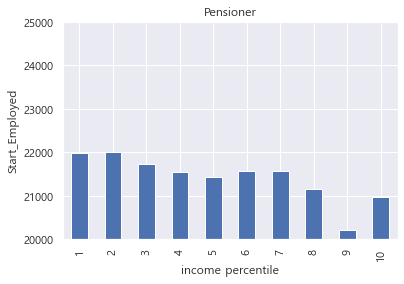

In [80]:
ans =  income_list[1] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(20000, 25000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Pensioner')

Pensioner


Text(0.5, 1.0, 'Pensioner')

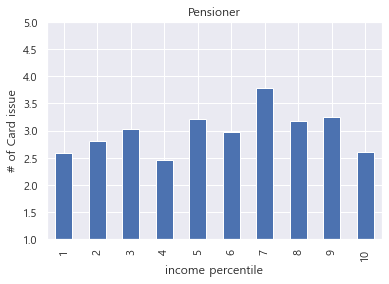

In [81]:
ans =  income_list[1] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Pensioner')

Pensioner


Text(0.5, 1.0, 'Pensioner')

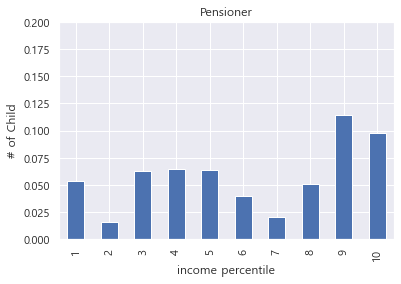

In [85]:
ans =  income_list[1] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, .2)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Pensioner')

#### (3) Working

Working


Text(0.5, 1.0, 'Working')

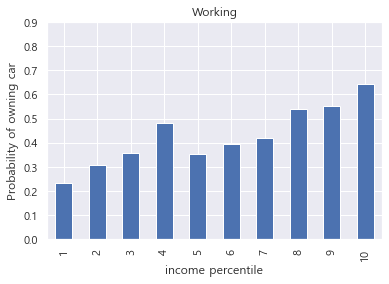

In [87]:
ans =  income_list[2]
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.9)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Working')

Working


Text(0.5, 1.0, 'Working')

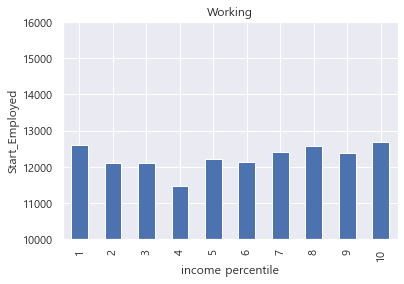

In [90]:
ans =  income_list[2] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['START_EMPLOYED'].mean().plot(kind = 'bar')
plt.ylim(10000, 16000)
plt.xlabel('income percentile')
plt.ylabel('Start_Employed')
plt.title('Working')

Working


Text(0.5, 1.0, 'Working')

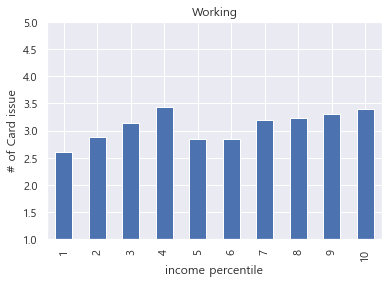

In [91]:
ans =  income_list[2] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylim(1, 5)
plt.xlabel('income percentile')
plt.ylabel('# of Card issue')
plt.title('Working')

Working


Text(0.5, 1.0, 'Working')

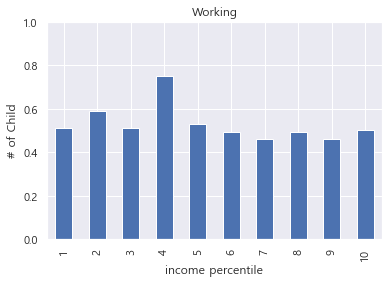

In [92]:
ans =  income_list[2] 
        
data = df[df['income_type'] == ans]

print(ans)
        
data.groupby('income_percentile')['child_num'].mean().plot(kind = 'bar')
plt.ylim(0, 1)
plt.xlabel('income percentile')
plt.ylabel('# of Child')
plt.title('Working')